<a href="https://colab.research.google.com/github/Mpho-AI/Keratoconus-Explainable-AI/blob/From-Colab/Keratoconus_Classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'keratoconus-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2847719%2F4910184%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240506%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240506T125134Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79c2330564910a7b415ddc74f8ef80cbf529458acb78e1adf984544946ad11bcbb64707982b095b38bd2970d032347cadfbe2bb9893056909401c6ba4a31fbf49c0741b8d6bdd5f87b29f83b7d58b845993bdb9292c95a5e1bea2b9982bc7621b4c7ef127bad03558f47a37f73a507e538cd85d90d84f4f5e91323c31480f6aabc1b8b9f56477ac8dc5af131edd01e74993be6dcb941709bc25ac1ed13905ec8f0d7f18412573bee5d9608ffa4db570709329db3a9d2c111c5d304295e408bc77f2ef29132b82f76d5cc507039fb11ebb8ff02ab5b5fce84ad0cc289cc9d1e954ed84db81c2c3d898290f60eebbf17e0bc6c6b278a128219d05e0cbfeb5687e4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 50927124 bytes downloaded
Downloaded and uncompressed: keratoconus-detection
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_Sag_P.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_Elv_A.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_EC_P.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_CT_A.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_Elv_P.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_Sag_A.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case46/NOR_46_EC_A.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case43/NOR_43_Elv_A.jpg
/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Normal/case43/NOR_43_Sag_P.jpg
/kaggle/input/keratoco

In [4]:
train_path = "/kaggle/input/keratoconus-detection/Train_Validation sets/Train_Validation sets"
test_path = "/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set"

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, LeakyReLU, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import models, layers
from tensorflow.keras.layers.experimental import preprocessing


In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

skip to test

In [ ]:
batch_size = 32
img_height = 256 #224
img_width = 256 #224
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [ ]:
import os

# Define the path to the 'case1' folder
case1_path = '/kaggle/input/keratoconus-detection/Independent Test Set/Independent Test Set/Keratoconus/case1'

# List files in the 'case1' folder
case1_files = os.listdir(case1_path)

# Print the file names
print("Files in 'case1' folder:")
for file_name in case1_files:
    print(file_name)


Files in 'case1' folder:
KCN_1_Elv_A.jpg
KCN_1_Elv_P.jpg
KCN_1_EC_P.jpg
KCN_1_Sag_A.jpg
KCN_1_Sag_P.jpg
KCN_1_CT_A.jpg
KCN_1_EC_A.jpg


# **Custom CNN 1**

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 25
n_classes = 3


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = models.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# model.build(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras import backend as K

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.argmax(y_pred, axis=1)
        y_pred = tf.cast(y_pred, tf.bool)

        true_positives = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        false_positives = tf.logical_and(tf.equal(y_true, False), tf.equal(y_pred, True))
        false_negatives = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, False))

        self.true_positives.assign_add(tf.reduce_sum(tf.cast(true_positives, self.dtype)))
        self.false_positives.assign_add(tf.reduce_sum(tf.cast(false_positives, self.dtype)))
        self.false_negatives.assign_add(tf.reduce_sum(tf.cast(false_negatives, self.dtype)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
        return 2 * (precision * recall) / (precision + recall + K.epsilon())

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

# Instantiate the metric
f1_score = F1Score()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy', AUC(), f1_score]
)


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 64)       

In [ ]:
from tensorflow.keras.models import Model

# Assuming `model` is your pre-trained model
# Remove the last dense layers and use the output of the last convolutional layer
model_feature = Model(inputs=model.input, outputs=model.get_layer('flatten_4').output)


In [ ]:
def extract_features(generator, model_feature):
    features = []
    labels = []
    for batch, label in generator:
        feature_batch = model_feature.predict(batch)
        features.append(feature_batch)
        labels.append(label)
        if len(features) * batch_size >= generator.samples:
            break
    return np.vstack(features), np.vstack(labels)

# Extract features from both training and test sets
train_features, train_labels = extract_features(train_generator, model_feature)
test_features, test_labels = extract_features(test_generator, model_feature)


1/1 [==============================] - 0s 181ms/step


In [ ]:
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create and train the SVM
svm_classifier = SVC(C=1.0, kernel='linear', verbose=True)
svm_classifier.fit(train_features, train_labels)

# Predict on the test set
svm_predictions = svm_classifier.predict(test_features)

# Evaluate the SVM
print("Accuracy on test set:", accuracy_score(test_labels, svm_predictions))
print(classification_report(test_labels, svm_predictions))


[LibSVM]Accuracy on test set: 0.44666666666666666
              precision    recall  f1-score   support

           0       0.55      0.52      0.54       350
           1       0.40      0.82      0.54       350
           2       0.00      0.00      0.00       350

    accuracy                           0.45      1050
   macro avg       0.32      0.45      0.36      1050
weighted avg       0.32      0.45      0.36      1050



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize labels for multi-class setting
n_classes = len(np.unique(train_labels))  # Assuming train_labels holds all possible classes
test_labels_bin = label_binarize(test_labels, classes=range(n_classes))

# Train SVM with probability estimates
svm_classifier = SVC(C=1.0, kernel='linear', verbose=True, probability=True)
svm_classifier.fit(train_features, train_labels)
probabilities = svm_classifier.predict_proba(test_features)

# Calculate multi-class AUC using One-vs-Rest approach
auc = roc_auc_score(test_labels_bin, probabilities, multi_class='ovr')
print("Multi-class AUC: {:.3f}".format(auc))


[LibSVM]Multi-class AUC: 0.623


# **Custom CNN 2**
from modifying the EfficientNetB4 pretreained model:
provides more flexibility in modifying the feature extractor architecture and allows you to experiment with different classifiers

In [ ]:
from tensorflow.keras import layers, optimizers, metrics, regularizers, models
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dropout

# Define the image shape for the input layer
input_shape = (224, 224, 3)
img_height = 256 #224
img_width = 256 #224

# Model name
model_name = 'EfficientNetB4'

# Load the base model from EfficientNetB4
base_model = tf.keras.applications.efficientnet.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape,
    pooling='max'
)

# Make the base model trainable
base_model.trainable = True

# Get the output from the base model
x = base_model.output

# Apply Batch Normalization
x = BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    name='batch_norm_x'
)(x)

# Optional: Apply a dropout layer if you think it's necessary for feature extraction
x = Dropout(
    rate=0.5,
    seed=123,
    name='dropout_x'
)(x)

# Create a new model that outputs features from the dropout layer
feature_extractor = Model(inputs=base_model.input, outputs=x, name=model_name)

# No need to compile since we're not training this model here
# feature_extractor.compile(
#     optimizer=Adamax(learning_rate=0.001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# View the model summary to check the new structure
feature_extractor.summary()


Model: "EfficientNetB4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_8 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_8[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_9 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2

## Train SVM

In [ ]:
batch_size = 32
img_height = 224
img_width = 224
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [ ]:
import numpy as np

def extract_features(generator, model, batch_size):
    features = []
    labels = []
    # Process the generator in batches
    for _ in range(len(generator)):
        x_batch, y_batch = next(generator)
        features_batch = model.predict(x_batch)
        features.append(features_batch)
        labels.append(y_batch)
        if len(features) * batch_size >= generator.samples:
            break
    # Stack all features and labels to create a unified array
    return np.vstack(features), np.vstack(labels)

# Example usage with your feature extractor and data generators
train_features, train_labels = extract_features(train_generator, feature_extractor, batch_size)
test_features, test_labels = extract_features(test_generator, feature_extractor, batch_size)


1/1 [==============================] - 1s 1s/step


In [ ]:
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the SVM
svm_classifier = SVC(C=1.0, kernel='linear', verbose=True)
svm_classifier.fit(train_features, train_labels)

# Predict on the test set
test_predictions = svm_classifier.predict(test_features)

# Evaluate the classifier
print("Test Accuracy:", accuracy_score(test_labels, test_predictions))
print(classification_report(test_labels, test_predictions))


[LibSVM]Test Accuracy: 0.45904761904761904
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       350
           1       0.57      0.23      0.33       350
           2       0.35      0.66      0.46       350

    accuracy                           0.46      1050
   macro avg       0.54      0.46      0.45      1050
weighted avg       0.54      0.46      0.45      1050



In [ ]:
from sklearn.svm import SVC

# Initialize the SVM with probability output
svm_classifier = SVC(C=1.0, kernel='linear', probability=True, verbose=True)
svm_classifier.fit(train_features, train_labels)


[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize labels in a one-vs-all fashion
n_classes = np.unique(train_labels).size
test_labels_binarized = label_binarize(test_labels, classes=range(n_classes))

# Predict probabilities for all classes
probabilities = svm_classifier.predict_proba(test_features)

# Compute AUC using One-vs-Rest approach
auc_score = roc_auc_score(test_labels_binarized, probabilities, multi_class='ovr')
print("Multi-class AUC: {:.3f}".format(auc_score))


Multi-class AUC: 0.638


# VGG19


In [ ]:
import os
import numpy as np
from sklearn import svm
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)



# Set the batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

# Create data generators
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Get the class names
class_names = train_generator.class_indices
class_names = [None] * len(class_names)
for k, v in train_generator.class_indices.items():
    class_names[v] = k

# Load the VGG19 model without the top layer (we'll use this for feature extraction)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Function to extract features from the dataset
def extract_features(generator, base_model):
    features = []
    labels = []
    for x, y in generator:
        feature_vector = base_model.predict(x)
        features.extend(feature_vector)
        labels.extend(y)
    return np.array(features), np.array(labels)

# Extract features and labels for training
train_features, train_labels = extract_features(train_generator, base_model)

# Train an SVM with the extracted features
svm_classifier = svm.SVC(kernel='linear', C=1)  # Linear SVM
svm_classifier.fit(train_features, np.argmax(train_labels, axis=1))

# Extract features and labels for testing
test_features, test_labels = extract_features(test_generator, base_model)

# Predict with the SVM on the test set
test_predictions = svm_classifier.predict(test_features)

# Evaluate the SVM
accuracy = np.mean(test_predictions == np.argmax(test_labels, axis=1)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.
1/1 [==============================] - 4s 4s/step


KeyboardInterrupt: 

# RESNET50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
base_model = ResNet50(
    include_top=False,  # Exclude the top layer
    weights='imagenet',  # Use ImageNet pre-trained weights
    input_shape=(224, 224, 3),  # Input shape for ResNet50
    pooling='avg'  # Pooling method (average pooling for output features)
)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import os
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# List of class names
class_names = ['Keratoconus', 'Normal', 'Suspect']

# Define ResNet50 without the top layer (we'll use this for feature extraction)
base_model = ResNet50(
    include_top=False,  # Exclude the top layer
    weights='imagenet',  # Use ImageNet pre-trained weights
    input_shape=(224, 224, 3),  # Input shape for ResNet50
    pooling='avg'  # Pooling method (average pooling for output features)
)

# Define data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input)

# Define batch size and image size
batch_size = 32
img_height = 224
img_width = 224

# Create data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Function to extract features and labels from the generators
def extract_features_and_labels(generator, base_model):
    features = []
    labels = []
    for _ in range(len(generator)):
        batch_images, batch_labels = generator.next()
        batch_features = base_model(batch_images)
        features.extend(batch_features.numpy())
        labels.extend(batch_labels)
    return np.array(features), np.array(labels)

# Extract features and labels for training
train_features, train_labels = extract_features_and_labels(train_generator, base_model)

# Train an SVM with the extracted features
svm_classifier = svm.SVC(kernel='linear', C=1)  # Linear SVM
train_labels_1d = np.argmax(train_labels, axis=1)  # Convert to 1-dimensional array
svm_classifier.fit(train_features, train_labels_1d)

# Extract features and labels for testing
test_features, test_labels = extract_features_and_labels(test_generator, base_model)

# Predict with the SVM on the test set
test_predictions = svm_classifier.predict(test_features)

# Evaluate the SVM
accuracy = np.mean(test_predictions == test_labels) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Display a confusion matrix for better insight into the model's performance
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


ValueError: operands could not be broadcast together with shapes (1050,) (1050,3) 

Test Accuracy: 57.43%


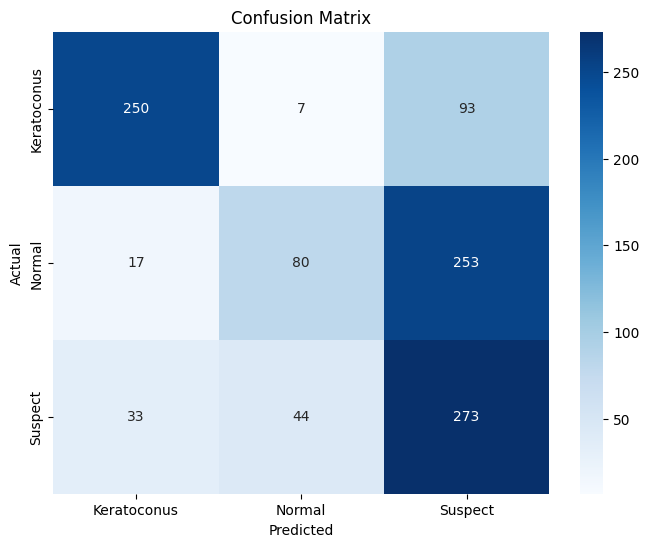

In [ ]:
# Evaluate the SVM
test_labels_1d = np.argmax(test_labels, axis=1)  # Convert to 1-dimensional array
accuracy = np.mean(test_predictions == test_labels_1d) * 100
print(f"Test Accuracy: {accuracy:.2f}%")



# Display a confusion matrix for better insight into the model's performance
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
test_labels_1d = np.argmax(test_labels, axis=1)  # Convert to multiclass format
conf_matrix = confusion_matrix(test_labels_1d, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Install Pycaret


In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 k

# Auto ML on custom CNN

In [9]:
def preprocess_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)
    pixels = image_lab.reshape((-1, 3))
    kmeans = KMeans(n_clusters=6, random_state=42).fit(pixels)
    labels = kmeans.labels_
    clustered_image = labels.reshape(image_rgb.shape[:2])
    _, thresholded_image = cv2.threshold(clustered_image.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    skel = skimage.morphology.skeletonize(thresholded_image > 0)
    skel = np.uint8(skel) * 255

    # Ensure the output image has 3 channels
    if len(skel.shape) == 2:
        skel = cv2.cvtColor(skel, cv2.COLOR_GRAY2RGB)

    return skel

# Define the image shape for the input layer
input_shape = (224, 224, 3)
img_height = 256
img_width = 256
BATCH_SIZE = 32
EPOCHS = 25
n_classes = 3
IMAGE_SIZE = 256
CHANNELS = 3


# Define data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_image
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1./255)
])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# model.build(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow.keras import backend as K

# Custom F1 Score Metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.bool)
        y_pred = tf.argmax(y_pred, axis=1)
        y_pred = tf.cast(y_pred, tf.bool)

        true_positives = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
        false_positives = tf.logical_and(tf.equal(y_true, False), tf.equal(y_pred, True))
        false_negatives = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, False))

        self.true_positives.assign_add(tf.reduce_sum(tf.cast(true_positives, self.dtype)))
        self.false_positives.assign_add(tf.reduce_sum(tf.cast(false_positives, self.dtype)))
        self.false_negatives.assign_add(tf.reduce_sum(tf.cast(false_negatives, self.dtype)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
        return 2 * (precision * recall) / (precision + recall + K.epsilon())

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

# Instantiate the metric
f1_score = F1Score()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy', AUC(), f1_score]
)


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [15]:
def extract_features(generator, model_feature):
    features = []
    labels = []
    for batch, label in generator:
        feature_batch = model_feature.predict(batch)
        features.append(feature_batch)
        labels.append(label)
        if len(features) * BATCH_SIZE >= generator.samples:
            break
    return np.vstack(features), np.vstack(labels)

In [17]:
from tensorflow.keras.models import Model

# Assuming `model` is your pre-trained model
# Remove the last dense layers and use the output of the last convolutional layer
model_feature = Model(inputs=model.input, outputs=model.get_layer('conv2d_5').output)


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import skimage.morphology
import skimage.measure
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Extract features from both training and test sets
train_features, train_labels = extract_features(train_generator, model_feature)
test_features, test_labels = extract_features(test_generator, model_feature)
# train_labels = train_labels[:2961]
print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)

# test_labels = train_labels[:1050]
print("Test Labels Shape:", test_labels.shape)
print("Test test_features Shape:", test_features.shape)


In [39]:
import numpy as np
import pandas as pd
from pycaret.classification import *

# Assuming you have already extracted the train_features and train_labels
train_features = np.reshape(train_features, (train_features.shape[0], -1))

# Reshape the train_labels to be one-dimensional
# train_labels = train_labels.reshape(-1)

# Extract features from the test data
# test_features, test_labels = extract_features(test_generator, model_feature)

# Reshape the test features
test_features = np.reshape(test_features, (test_features.shape[0], -1))

# Reshape the test_labels to be one-dimensional
# test_labels = test_labels.reshape(-1)



In [40]:
# train_labels = train_labels[:2961]
print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)

# test_labels = train_labels[:1050]
print("Test Labels Shape:", test_labels.shape)
print("Test test_features Shape:", test_features.shape)

Train Features Shape: (2961, 1024)
Train Labels Shape: (2961, 3)
Test Labels Shape: (1050, 3)
Test test_features Shape: (1050, 1024)


In [ ]:
# train_labels = train_labels[:2961]
print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)

# test_labels = train_labels[:1050]
print("Test Labels Shape:", test_labels.shape)
# print("Test Pred Shape:", test_pred.shape)

In [ ]:
# Create a PyCaret classification environment
# clf = setup(data=pd.DataFrame(train_features), target=train_labels, use_gpu=True)
# Create a PyCaret classification environment
# clf = setup(data=pd.DataFrame(train_features), target=train_labels, use_gpu=True, multi_class=True)
# Create a PyCaret classification environment
from pycaret.classification import *

import pandas as pd

# Convert target variable to categorical data type
# train_labels = pd.Categorical(train_labels)

# Create a PyCaret classification environment
clf = setup(data=pd.DataFrame(train_features),
            target=train_labels,
            use_gpu=True,
            # handle_imbalance=True
            )  # Enable handling of imbalanced data
# Perform autoML
best_model = compare_models()

# # Evaluate the best model on the test set
# test_pred = predict(best_model, data=pd.DataFrame(test_features))
# print("Test Accuracy:", accuracy_score(test_labels, test_pred))
# print(classification_report(test_labels, test_pred))

In [43]:
import pandas as pd
import numpy as np
from pycaret.classification import setup, compare_models

import pandas as pd
import numpy as np
from pycaret.classification import setup, compare_models

# Ensure the DataFrame column names are strings
train_features_df = pd.DataFrame(train_features)
train_features_df.columns = [str(col) for col in train_features_df.columns]

# Ensure the target series has a proper name and string type labels if necessary
label_encoded_series = pd.Series(label_encoded, name='Target')

# Now try setting up PyCaret
try:
    clf = setup(data=train_features_df,
                target=label_encoded_series,
                use_gpu=True,
                session_id=123)  # Ensuring reproducibility

    # Compare models to find the best one
    best_model = compare_models()

except Exception as e:
    print("An error occurred:", e)

# Compare models to find the best one
best_model = compare_models()


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(2961, 1025)"
4,Transformed data shape,"(2961, 1025)"
5,Transformed train set shape,"(2072, 1025)"
6,Transformed test set shape,"(889, 1025)"
7,Numeric features,1024
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5907,0.0000,0.5907,0.5880,0.5750,0.3763,0.3861,0.4340
lightgbm,Light Gradient Boosting Machine,0.5840,0.7677,0.5840,0.5822,0.5759,0.3681,0.3732,9.3460
knn,K Neighbors Classifier,0.5796,0.7482,0.5796,0.5833,0.5753,0.3629,0.3672,0.3210
gbc,Gradient Boosting Classifier,0.5724,0.0000,0.5724,0.5698,0.5644,0.3509,0.3555,147.1140
rf,Random Forest Classifier,0.5690,0.7443,0.5690,0.5683,0.5490,0.3418,0.3557,1.1810
xgboost,Extreme Gradient Boosting,0.5690,0.7533,0.5690,0.5651,0.5606,0.3455,0.3502,18.6890
lr,Logistic Regression,0.5656,0.0000,0.5656,0.5633,0.5403,0.3359,0.3536,0.6430
et,Extra Trees Classifier,0.5618,0.7410,0.5618,0.5683,0.5386,0.3295,0.3475,0.6700
svm,SVM - Linear Kernel,0.5096,0.0000,0.5096,0.5468,0.4875,0.2643,0.2851,0.6660
ada,Ada Boost Classifier,0.4942,0.0000,0.4942,0.4920,0.4884,0.2335,0.2358,9.3750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.5907,0.0000,0.5907,0.5880,0.5750,0.3763,0.3861,0.4090
lightgbm,Light Gradient Boosting Machine,0.5840,0.7677,0.5840,0.5822,0.5759,0.3681,0.3732,9.0510
knn,K Neighbors Classifier,0.5796,0.7482,0.5796,0.5833,0.5753,0.3629,0.3672,0.3110
gbc,Gradient Boosting Classifier,0.5724,0.0000,0.5724,0.5698,0.5644,0.3509,0.3555,146.6790
rf,Random Forest Classifier,0.5690,0.7443,0.5690,0.5683,0.5490,0.3418,0.3557,1.1980
xgboost,Extreme Gradient Boosting,0.5690,0.7533,0.5690,0.5651,0.5606,0.3455,0.3502,18.7740
lr,Logistic Regression,0.5656,0.0000,0.5656,0.5633,0.5403,0.3359,0.3536,0.6610
et,Extra Trees Classifier,0.5618,0.7410,0.5618,0.5683,0.5386,0.3295,0.3475,0.6770
svm,SVM - Linear Kernel,0.5096,0.0000,0.5096,0.5468,0.4875,0.2643,0.2851,0.6760
ada,Ada Boost Classifier,0.4942,0.0000,0.4942,0.4920,0.4884,0.2335,0.2358,9.3550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the best model on the test set
test_pred = best_model.predict(pd.DataFrame(test_features))
print("Test Accuracy:", accuracy_score(test_labels, test_pred))
print(classification_report(test_labels, test_pred))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Ensure that the predictions are obtained correctly
test_pred = best_model.predict(pd.DataFrame(test_features))

# If test_labels is one-hot encoded, convert it to label encoding
if test_labels.ndim > 1:
    test_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
print("Test Accuracy:", accuracy_score(test_labels, test_pred))

# Generate and print classification report
report = classification_report(test_labels, test_pred, target_names=['Class 1', 'Class 2', 'Class 3'])
print(report)


In [ ]:
from IPython.display import display, Javascript

def disconnect_runtime():
    display(Javascript('google.colab.kernel.disconnect()'))

# Place your code here
# For example:
print("Executing some task...")
# Your task code goes here

# Call disconnect
disconnect_runtime()


# AutoML on EfficientNet

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
import pandas as pd
from pycaret.classification import setup, compare_models, predict_model

In [7]:
import cv2
from sklearn.cluster import KMeans

def preprocess_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2Lab)
    pixels = image_lab.reshape((-1, 3))
    kmeans = KMeans(n_clusters=6, random_state=42).fit(pixels)
    labels = kmeans.labels_
    clustered_image = labels.reshape(image_rgb.shape[:2])
    clustered_image = clustered_image.astype(np.uint8)

    # Ensure the output image has 3 channels
    if len(clustered_image.shape) == 2:
        clustered_image = cv2.cvtColor(clustered_image, cv2.COLOR_GRAY2RGB)

    return clustered_image

def combined_preprocess_function(image):
    # Apply custom preprocessing
    image = preprocess_image(image)

    # Apply EfficientNet preprocessing
    return tf.keras.applications.efficientnet.preprocess_input(image)


In [8]:
# Image specifications
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32


datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=combined_preprocess_function)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [9]:
# Load EfficientNet without the top layer (classifier)
base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), pooling='avg')

# Create a new model with the output of EfficientNet
model_feature = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(generator, model):
    features = []
    labels = []
    for batch, label in generator:
        feature_batch = model.predict(batch)
        features.append(feature_batch)
        labels.append(label)
        if len(features) * BATCH_SIZE >= generator.samples:
            break
    return np.vstack(features), np.vstack(labels)

# Extract features
train_features, train_labels = extract_features(train_generator, model_feature)
test_features, test_labels = extract_features(test_generator, model_feature)


1/1 [==============================] - 0s 98ms/step


In [10]:
# train_labels = train_labels[:2961]
print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)

# test_labels = train_labels[:1050]
print("Test Labels Shape:", test_labels.shape)
print("Test features Shape:", test_features.shape)

Train Features Shape: (2961, 1280)
Train Labels Shape: (2961, 3)
Test Labels Shape: (1050, 3)
Test features Shape: (1050, 1280)


In [11]:
# Flatten features for PyCaret
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# train_labels = train_labels[:2961]
print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)

# test_labels = train_labels[:1050]
print("Test Labels Shape:", test_labels.shape)
print("Test features Shape:", test_features.shape)


# Convert train_labels from one-hot encoded to integer labels
train_labels_integer = train_labels.argmax(axis=1)

# Prepare the DataFrame for features
train_features_df = pd.DataFrame(train_features_flat)
train_features_df.columns = [f'feature_{i}' for i in range(train_features_df.shape[1])]

# Prepare the target data
train_labels_df = pd.Series(train_labels_integer, name='target')

# Setup PyCaret
clf = setup(data=train_features_df, target=train_labels_df,
            session_id=123, use_gpu=True, preprocess=False)

# Compare models to find the best
best_model = compare_models()


Train Features Shape: (2961, 1280)
Train Labels Shape: (2961, 3)
Test Labels Shape: (1050, 3)
Test features Shape: (1050, 1280)
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisf

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(2961, 1281)"
4,Transformed data shape,"(2961, 1281)"
5,Transformed train set shape,"(2072, 1281)"
6,Transformed test set shape,"(889, 1281)"
7,Numeric features,1280


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6284,0.8013,0.6284,0.6189,0.6193,0.4371,0.4403,4.2540
lightgbm,Light Gradient Boosting Machine,0.6274,0.8023,0.6274,0.6188,0.6199,0.4358,0.4382,6.4480
ridge,Ridge Classifier,0.6207,0.0000,0.6207,0.6271,0.6106,0.4229,0.4335,0.2600
et,Extra Trees Classifier,0.6139,0.7799,0.6139,0.5993,0.5969,0.4124,0.4188,0.4220
gbc,Gradient Boosting Classifier,0.6081,0.0000,0.6081,0.5966,0.5978,0.4055,0.4088,292.9920
rf,Random Forest Classifier,0.6013,0.7783,0.6013,0.5866,0.5852,0.3935,0.3992,0.8770
lr,Logistic Regression,0.5975,0.0000,0.5975,0.6045,0.5896,0.3883,0.3971,0.9860
knn,K Neighbors Classifier,0.5613,0.7308,0.5613,0.5503,0.5450,0.3316,0.3379,0.2310
ada,Ada Boost Classifier,0.5401,0.0000,0.5401,0.5427,0.5398,0.3057,0.3067,18.0250
svm,SVM - Linear Kernel,0.5329,0.0000,0.5329,0.6023,0.4878,0.2935,0.3331,0.7390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]